In [1]:
from plotting.style_setup import setup_plot_style
from metrics_extractor import MetricsExtractor, PrometheusSource, metrics_io
from datetime import datetime, timedelta, timezone
from plotting.plot_templates import *
setup_plot_style()

# Available Metrics

In [8]:
type_exp = "mod"


selected_metrics = [
    # "mc_players_online_local{world='world'}", #0
    # "mc_tps", #1
    # "quantile(0.5, mc_tps)", #2
    # "quantile(0.95, mc_tps)", #3
    # "sum(mc_players_online_local{world='world'})", #4
    # "count(count by(server_name) (mc_tps))", #5
    # "mc_mspt_seconds_10_mean", #6
    # "rate(container_network_receive_bytes_total{pod=~'multipaper-master-.*'}[1m])", #7
    # "rate(container_network_transmit_bytes_total{pod=~'multipaper-master-.*'}[1m])", #8
    # "rate(container_network_receive_bytes_total{pod=~'multipaper-server-.*'}[1m])", #9
    # "rate(container_network_transmit_bytes_total{pod=~'multipaper-server-.*'}[1m])", #10
    # "container_memory_usage_bytes{container='multipaper-master-velocity'}", #11
    # "container_memory_usage_bytes{container='multipaper-server'}", #12
    # "rate(container_cpu_usage_seconds_total{container='multipaper-master-velocity'}[1m])", #13
    # "rate(container_cpu_usage_seconds_total{container='multipaper-server'}[1m])", #14
    # "sum by(owner) (mc_chunk_ownership)", #15
    # "minecraft_world_loaded_chunks{world='world'}", #16
    # "mc_player_location", #17

    "sum by(chunk_owner) (mc_player_location)", #18

    # "server_latency", #19
    # "avg(server_latency)", #20
    # "max(server_latency)", #21
    # "min(server_latency)", #22 
    # "quantile(0.5, server_latency)", #23
    # "quantile(0.99, server_latency)", #24
    # "avg(mc_tps)", #25
    # "avg(mc_mspt_seconds_10_mean)", #26
    # "quantile(0.95, mc_mspt_seconds_10_mean)", #27
    # "quantile(0.5, mc_mspt_seconds_10_mean)", #28
    # "max(mc_tps)", #29
    # "min(mc_tps)", #30
    # "min(mc_mspt_seconds_10_mean)", #31
    # "max(mc_mspt_seconds_10_mean)", #32

    # "sum(mc_tps)", #33
    # "quantile(0.99, mc_tps)", #34
    # "minecraft_tick_duration_seconds_bucket", #35
    # "sum(rate(minecraft_tick_duration_seconds_bucket[2s])) by(le)", #36
    # "mc_chunk_ownership", #37
]


### Change Time Zone (to UTC + 02:00)

Only if needed

In [9]:
def change_timezone(input_time):
    """
    Change the timezone of the timestamp from UTC to UTC +020:00 (Europe/Berlin).
    """
    utc = timezone.utc
    utc_plus_2 = timezone(timedelta(hours=2))

    from_time = datetime.strptime(input_time["from"], "%Y-%m-%d %H:%M:%S").replace(tzinfo=utc)
    to_time = datetime.strptime(input_time["to"], "%Y-%m-%d %H:%M:%S").replace(tzinfo=utc)

    from_time_local = from_time.astimezone(utc_plus_2)
    to_time_local = to_time.astimezone(utc_plus_2)

    return from_time_local, to_time_local

# Extract Metrics

In [10]:
experiment = "scaling_migration_800"

input_time = {"from":"2025-07-03 08:46:22","to":"2025-07-03 09:33:28"}

# Uncomment the following lines to use the original time parsing UTC +00
from_time = datetime.strptime(input_time["from"], "%Y-%m-%d %H:%M:%S")
to_time = datetime.strptime(input_time["to"], "%Y-%m-%d %H:%M:%S")

# Use the change_timezone function to convert the time to UTC +02:00
# from_time, to_time = change_timezone(input_time)

# UNCOMMENT THE FOLLOWING LINES TO EXTRACT METRICS FROM PROMETHEUS
prometheus = PrometheusSource(url="http://localhost:44617/")
extractor = MetricsExtractor()

metrics_io.save_metrics(selected_metrics, from_time, to_time, prometheus, extractor, experiment, type_exp)

2025-07-03 11:09:36,983 - metrics_extractor - INFO - Handling function query: sum by(chunk_owner) (mc_player_location)


2025-07-03 11:17:43,016 - metrics_extractor - WARNING - Failed to get data for metric sum by(chunk_owner) (mc_player_location): HTTPConnectionPool(host='localhost', port=44617): Max retries exceeded with url: /api/v1/query_range?query=sum+by%28chunk_owner%29+%28mc_player_location%29&start=1751525182&end=1751528008&step=1s (Caused by ResponseError('too many 503 error responses'))


# Plots

## 2 Servers

### Idle + Interval

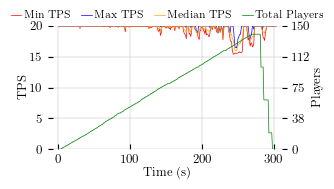

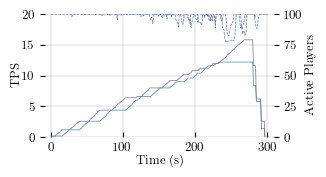

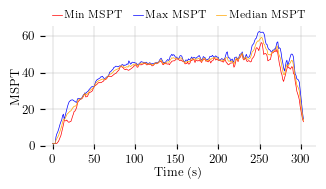

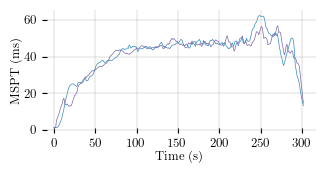

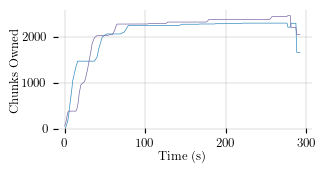

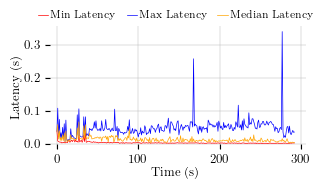

In [9]:
experiment = "2s_idle_interval"
# tps_players_plot(experiment, selected_metrics, type_exp)
tps_players_stats_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
latency_plot(experiment, selected_metrics, type_exp)
# tps_servers_plot(experiment, selected_metrics, type_exp)
# players_servers_plot(experiment, selected_metrics, type_exp)
# players_chunks_owner_plot(experiment, selected_metrics, type_exp)

# 4 Servers Interval

## Idle

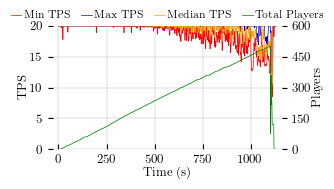

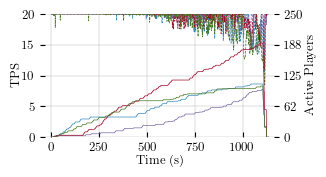

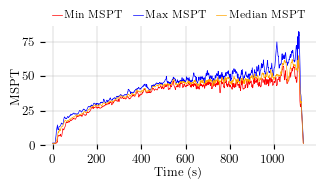

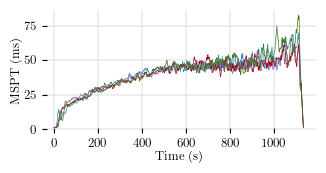

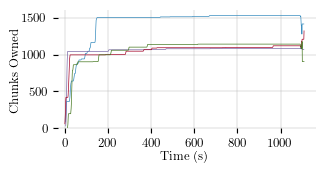

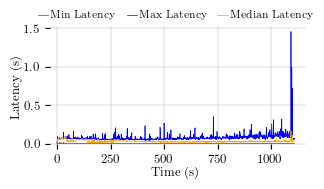

In [10]:
experiment = "4s_idle_interval"
# tps_players_plot(experiment, selected_metrics, type_exp)
tps_players_stats_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
latency_plot(experiment, selected_metrics, type_exp)
# tps_servers_plot(experiment, selected_metrics, type_exp)
# players_servers_plot(experiment, selected_metrics, type_exp)
# players_chunks_owner_plot(experiment, selected_metrics, type_exp)

# Scaling

## Idle interval 1s

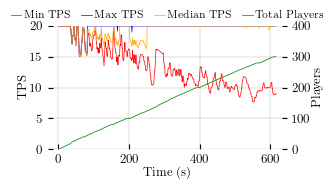

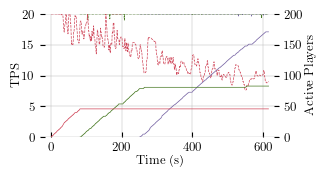

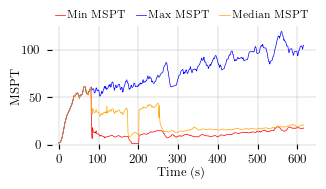

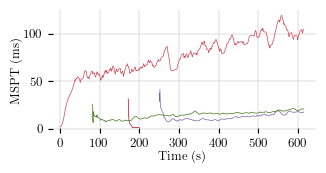

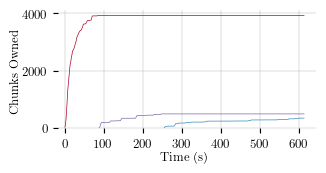

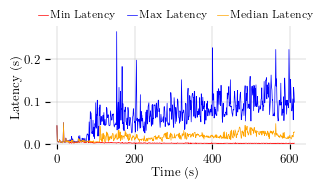

In [11]:
experiment = "scaling_idle_interval_1s"
# tps_players_plot(experiment, selected_metrics, type_exp)
tps_players_stats_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
latency_plot(experiment, selected_metrics, type_exp)
# tps_servers_plot(experiment, selected_metrics, type_exp)
# players_servers_plot(experiment, selected_metrics, type_exp)
# players_chunks_owner_plot(experiment, selected_metrics, type_exp)

## Idle interval 5s

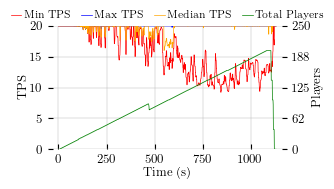

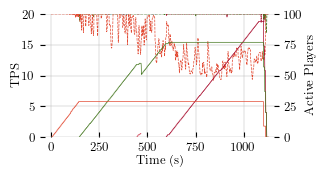

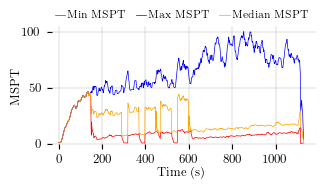

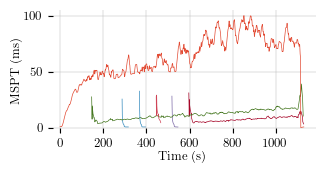

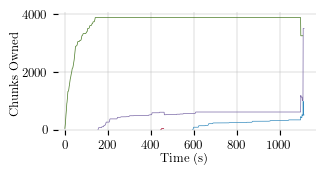

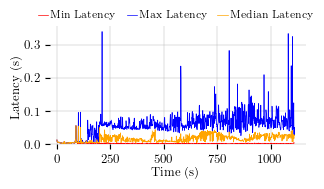

In [12]:
experiment = "scaling_idle_interval_5s"
# tps_players_plot(experiment, selected_metrics, type_exp)
tps_players_stats_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
latency_plot(experiment, selected_metrics, type_exp)
# tps_servers_plot(experiment, selected_metrics, type_exp)
# players_servers_plot(experiment, selected_metrics, type_exp)
# players_chunks_owner_plot(experiment, selected_metrics, type_exp)

## Idle batch

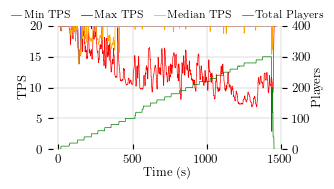

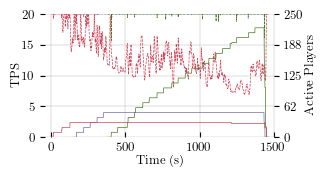

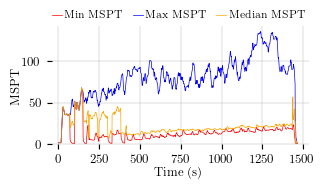

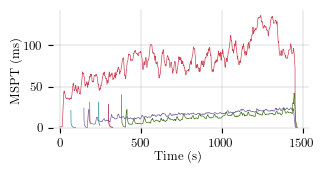

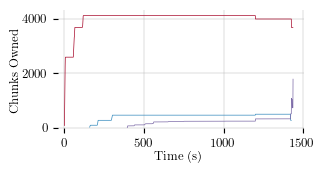

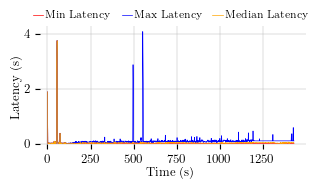

In [13]:
experiment = "scaling_idle_batch"
# tps_players_plot(experiment, selected_metrics, type_exp)
tps_players_stats_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
latency_plot(experiment, selected_metrics, type_exp)
# tps_servers_plot(experiment, selected_metrics, type_exp)
# players_servers_plot(experiment, selected_metrics, type_exp)
# players_chunks_owner_plot(experiment, selected_metrics, type_exp)

## Walk interval 1s

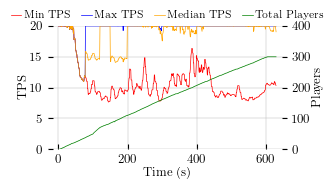

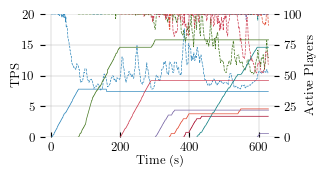

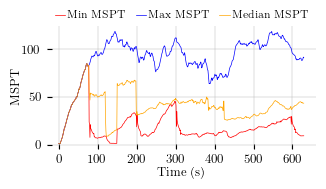

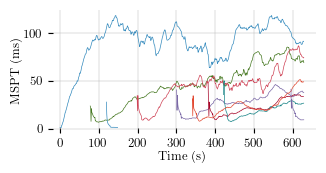

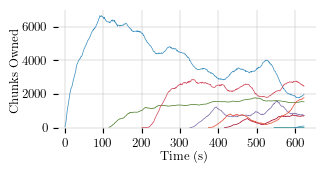

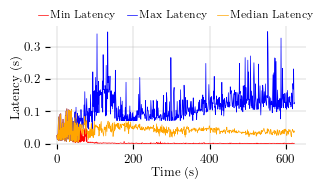

In [14]:
experiment = "scaling_walk_interval_1s"
# tps_players_plot(experiment, selected_metrics, type_exp)
tps_players_stats_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
latency_plot(experiment, selected_metrics, type_exp)
# tps_servers_plot(experiment, selected_metrics, type_exp)
# players_servers_plot(experiment, selected_metrics, type_exp)
# players_chunks_owner_plot(experiment, selected_metrics, type_exp)

## Walk interval 5s

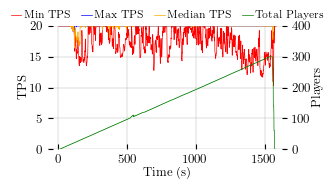

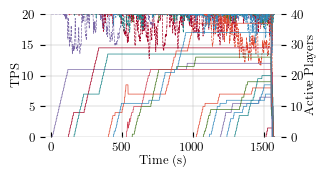

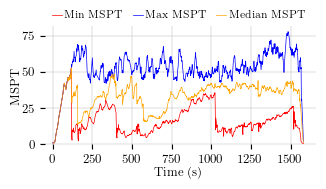

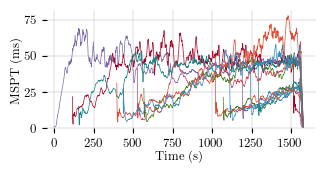

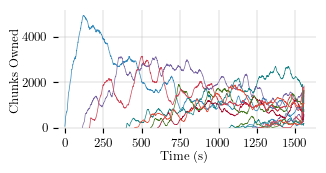

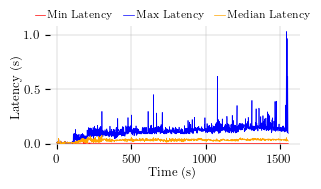

In [15]:
experiment = "scaling_walk_interval_5s"
# tps_players_plot(experiment, selected_metrics, type_exp)
tps_players_stats_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
latency_plot(experiment, selected_metrics, type_exp)
# tps_servers_plot(experiment, selected_metrics, type_exp)
# players_servers_plot(experiment, selected_metrics, type_exp)
# players_chunks_owner_plot(experiment, selected_metrics, type_exp)

# Migration

## walk 3 servers 1 overloaded
40-10-11


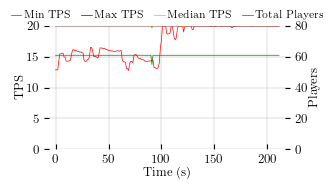

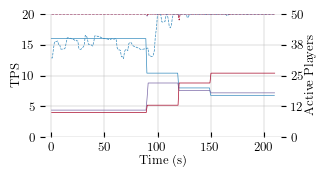

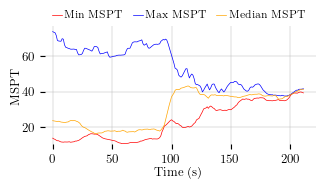

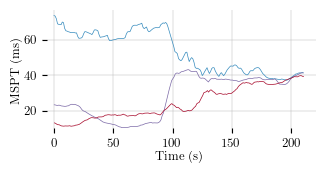

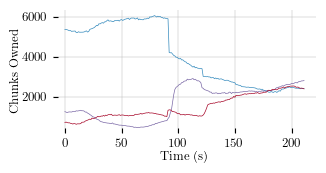

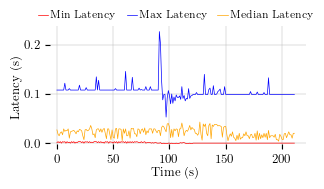

In [16]:
experiment = "migration_walk_3s"
# tps_players_plot(experiment, selected_metrics, type_exp)
tps_players_stats_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
latency_plot(experiment, selected_metrics, type_exp)
# tps_servers_plot(experiment, selected_metrics, type_exp)
# players_servers_plot(experiment, selected_metrics, type_exp)
# players_chunks_owner_plot(experiment, selected_metrics, type_exp)

## walk 5 servers 2 overloaded
40-39-15-14-13

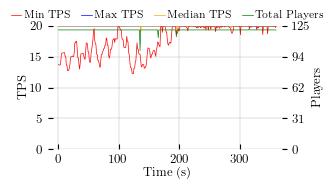

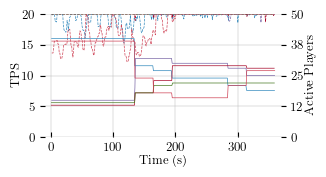

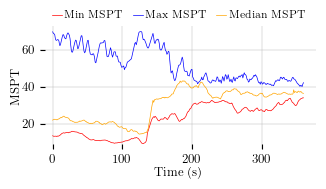

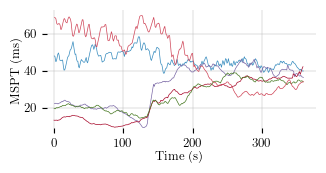

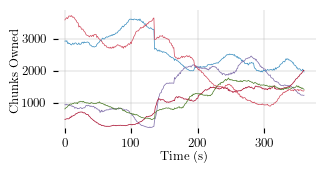

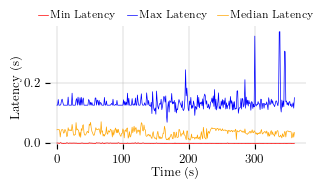

In [17]:
experiment = "migration_walk_5s"
# tps_players_plot(experiment, selected_metrics, type_exp)
tps_players_stats_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
latency_plot(experiment, selected_metrics, type_exp)
# tps_servers_plot(experiment, selected_metrics, type_exp)
# players_servers_plot(experiment, selected_metrics, type_exp)
# players_chunks_owner_plot(experiment, selected_metrics, type_exp)

# scaling & migration walk

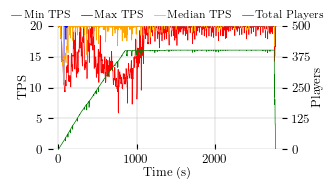

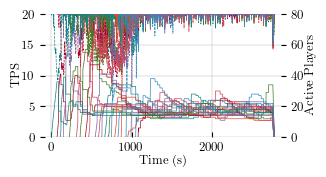

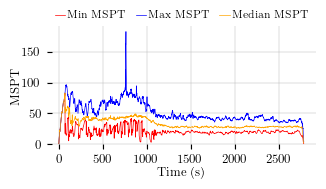

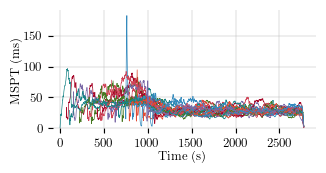

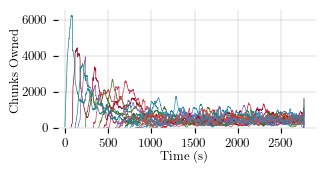

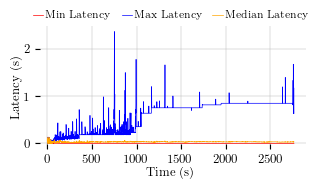

In [18]:
experiment = "scaling_migration_1"
# tps_players_plot(experiment, selected_metrics, type_exp)
tps_players_stats_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
latency_plot(experiment, selected_metrics, type_exp)
# tps_servers_plot(experiment, selected_metrics, type_exp)
# players_servers_plot(experiment, selected_metrics, type_exp)
# players_chunks_owner_plot(experiment, selected_metrics, type_exp)

# scaling & migration walk 800 bots 38 servers
view distance 5 chunks

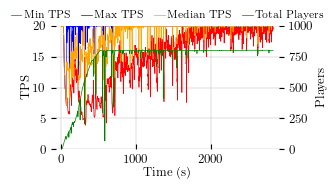

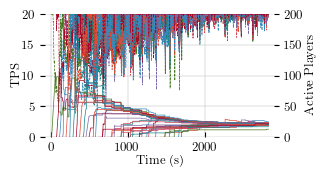

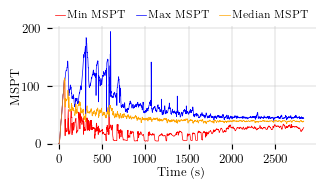

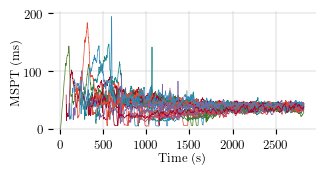

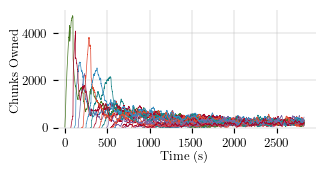

In [7]:
experiment = "scaling_migration_800"
# tps_players_plot(experiment, selected_metrics, type_exp)
tps_players_stats_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
# latency_plot(experiment, selected_metrics, type_exp)
# tps_servers_plot(experiment, selected_metrics, type_exp)
# players_servers_plot(experiment, selected_metrics, type_exp)
# players_chunks_owner_plot(experiment, selected_metrics, type_exp)

# Multibot scaling+migration


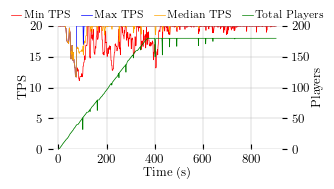

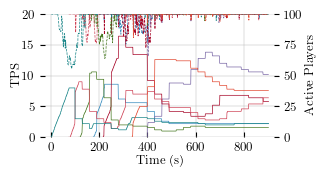

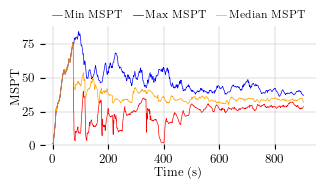

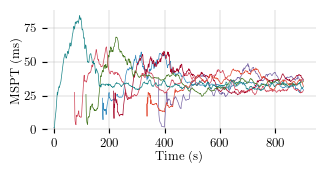

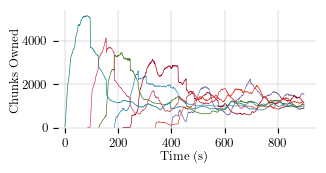

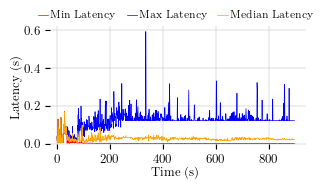

In [19]:
experiment = "multibot_interval"
# tps_players_plot(experiment, selected_metrics, type_exp)
tps_players_stats_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
latency_plot(experiment, selected_metrics, type_exp)
# tps_servers_plot(experiment, selected_metrics, type_exp)
# players_servers_plot(experiment, selected_metrics, type_exp)
# players_chunks_owner_plot(experiment, selected_metrics, type_exp)

# server latency


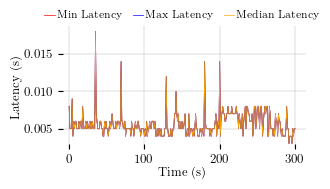

In [20]:
experiment = "1s_latency_1msg"
latency_plot(experiment, selected_metrics, type_exp)

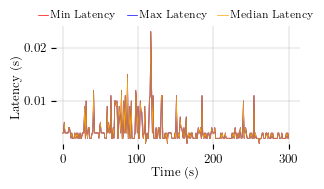

In [21]:
experiment = "1s_latency_32msg"
latency_plot(experiment, selected_metrics, type_exp)

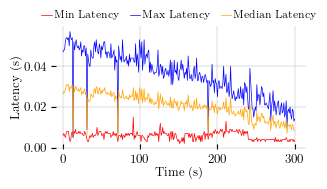

In [22]:
experiment = "2s_latency_1msg"
latency_plot(experiment, selected_metrics, type_exp)

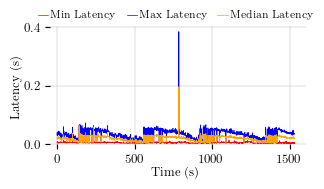

In [23]:
experiment = "2s_latency_1msg_pattern"
latency_plot(experiment, selected_metrics, type_exp)

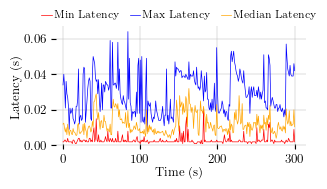

In [24]:
experiment = "2s_latency_64msg"
latency_plot(experiment, selected_metrics, type_exp)

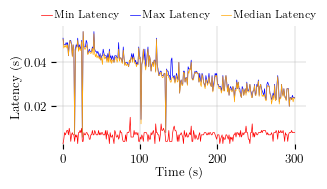

In [25]:
experiment = "4s_latency_1msg"
latency_plot(experiment, selected_metrics, type_exp)

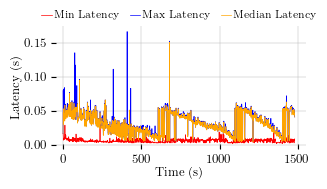

In [26]:
experiment = "4s_latency_1msg_pattern"
latency_plot(experiment, selected_metrics, type_exp)

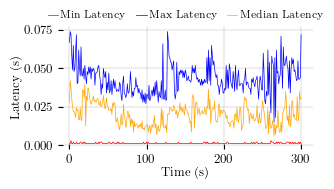

In [27]:
experiment = "4s_latency_64msg"
latency_plot(experiment, selected_metrics, type_exp)

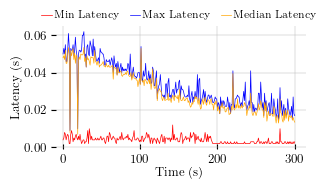

In [28]:
experiment = "8s_latency_1msg"
latency_plot(experiment, selected_metrics, type_exp)

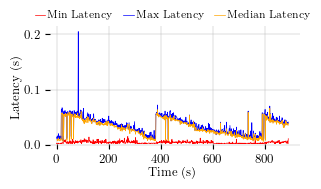

In [29]:
experiment = "8s_latency_1msg_pattern"
latency_plot(experiment, selected_metrics, type_exp)

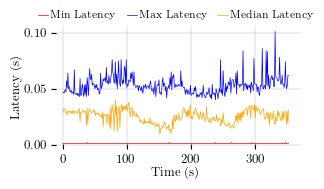

In [30]:
experiment = "8s_latency_64msg"
latency_plot(experiment, selected_metrics, type_exp)

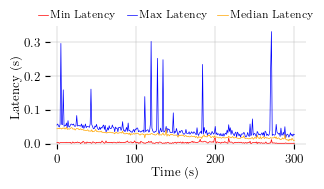

In [31]:
experiment = "16s_latency_1msg"
latency_plot(experiment, selected_metrics, type_exp)

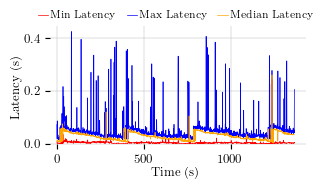

In [32]:
experiment = "16s_latency_1msg_pattern"
latency_plot(experiment, selected_metrics, type_exp)

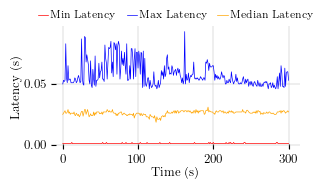

In [33]:
experiment = "16s_latency_32msg"
latency_plot(experiment, selected_metrics, type_exp)